In [1]:
import pandas as pd
import json
from matplotlib import pyplot as plt

In [2]:
# load in data
player_rankings = pd.read_csv("rankings_1973-2017_csv.csv")
player_rankings = player_rankings.drop(columns=['rank_text']) # drop unecessary columns

c:\users\mark\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
player_rankings.head()

,week_title,week_year,week_month,week_day,rank_number,move_positions,move_direction,player_age,ranking_points,tourneys_played,player_url,player_slug,player_id
0,2017.11.20,2017,11,20,1,NaN,NaN,31.0,10645,18,/en/players/rafael-nadal/n409/overview,rafael-nadal,n409
1,2017.11.20,2017,11,20,2,NaN,NaN,36.0,9605,17,/en/players/roger-federer/f324/overview,roger-federer,f324
2,2017.11.20,2017,11,20,3,3.0,up,26.0,5150,23,/en/players/grigor-dimitrov/d875/overview,grigor-dimitrov,d875
3,2017.11.20,2017,11,20,4,1.0,down,20.0,4610,25,/en/players/alexander-zverev/z355/overview,alexander-zverev,z355
4,2017.11.20,2017,11,20,5,1.0,down,24.0,4015,27,/en/players/dominic-thiem/tb69/overview,dominic-thiem,tb69


In [4]:
player_overview = pd.read_csv("player_overviews_unindexed_csv.csv")

In [5]:
player_overview.head()

,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,ricardo-acuna,Ricardo,Acuna,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",1958.01.13,1958.0,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,sadiq-abdullahi,Sadiq,Abdullahi,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,1960.02.02,1960.0,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,nelson-aerts,Nelson,Aerts,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",1963.04.25,1963.0,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,egan-adams,Egan,Adams,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959.06.15,1959.0,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,ronald-agenor,Ronald,Agenor,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964.11.13,1964.0,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


In [6]:
# merge rankings and player overview based on player id
joined = player_rankings.merge(player_overview, left_on='player_id', right_on='player_id', how='left')

In [7]:
joined['flag_code'][:100].value_counts()[:15].dropna().shape

(15,)

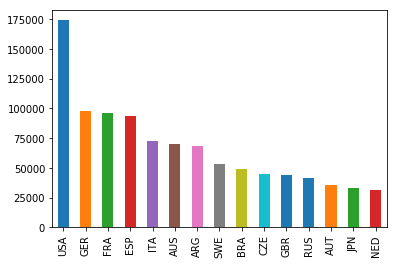

In [8]:
joined['flag_code'][101:].value_counts()[:15].plot(kind='bar')

In [9]:
flag_grouped = joined.groupby(['flag_code']).count()

In [28]:
temp = (joined.loc[joined['week_year'] == 1973]).iloc[:2000,:]

In [25]:
joined['flag_code'][:100].value_counts()[:15].to_json(orient='index')

'{"FRA":10,"USA":9,"ESP":8,"GER":8,"ARG":7,"SRB":5,"RUS":5,"ITA":4,"GBR":3,"AUS":3,"CRO":3,"JPN":3,"AUT":2,"CZE":2,"CAN":2}'

In [29]:

def top100_to_json():
    '''parse sets of rankings from latest entry in each year, store in json file keyed by year'''
    my_dict = {}
    for i in range(1973, 2018):
        by_year = (joined.loc[joined['week_year'] == i]).iloc[:2000,:]
        counts = by_year['flag_code'][:100].value_counts()[:15].dropna()
        json_decoded = json.loads(counts.to_json(orient='index'))
        
        my_dict[i] = json_decoded
        
    my_dict2 = {}
    for i in range(1973, 2018):
        by_year = (joined.loc[joined['week_year'] == i]).iloc[:2000,:]
        counts = by_year['flag_code'][101:2000].value_counts()[:15].dropna()
        json_decoded = json.loads(counts.to_json(orient='index'))
        
        my_dict2[i] = json_decoded
        
    ans = {}
    ans['top'] = my_dict
    ans['bot'] = my_dict2
    with open('players.json', 'w') as json_file:
        json.dump(ans, json_file)
    

In [30]:
top100_to_json()
    

In [32]:
pd.set_option('display.max_columns', 500)
joined

,week_title,week_year,week_month,week_day,rank_number,move_positions,move_direction,player_age,ranking_points,tourneys_played,player_url_x,player_slug_x,player_id,player_slug_y,first_name,last_name,player_url_y,flag_code,residence,birthplace,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,2017.11.20,2017,11,20,1,NaN,NaN,31.0,10645,18,/en/players/rafael-nadal/n409/overview,rafael-nadal,n409,rafael-nadal,Rafael,Nadal,http://www.atpworldtour.com/en/players/rafael-...,ESP,"Manacor, Mallorca, Spain","Manacor, Mallorca, Spain",1986.06.03,1986.0,6.0,3.0,2001.0,188.0,85.0,"6'1""",73.0,185.0,Left-Handed,Two-Handed Backhand
1,2017.11.20,2017,11,20,2,NaN,NaN,36.0,9605,17,/en/players/roger-federer/f324/overview,roger-federer,f324,roger-federer,Roger,Federer,http://www.atpworldtour.com/en/players/roger-f...,SUI,Switzerland,"Basel, Switzerland",1981.08.08,1981.0,8.0,8.0,1998.0,187.0,85.0,"6'1""",73.0,185.0,Right-Handed,One-Handed Backhand
2,2017.11.20,2017,11,20,3,3.0,up,26.0,5150,23,/en/players/grigor-dimitrov/d875/overview,grigor-dimitrov,d875,grigor-dimitrov,Grigor,Dimitrov,http://www.atpworldtour.com/en/players/grigor-...,BUL,"Monte Carlo, Monaco","Haskovo, Bulgaria",1991.05.16,1991.0,5.0,16.0,2008.0,176.0,80.0,"6'3""",75.0,191.0,Right-Handed,One-Handed Backhand
3,2017.11.20,2017,11,20,4,1.0,down,20.0,4610,25,/en/players/alexander-zverev/z355/overview,alexander-zverev,z355,alexander-zverev,Alexander,Zverev,http://www.atpworldtour.com/en/players/alexand...,GER,"Monte Carlo, Monaco","Hamburg, Germany",1997.04.20,1997.0,4.0,20.0,2013.0,189.0,86.0,"6'6""",78.0,198.0,Right-Handed,Two-Handed Backhand
4,2017.11.20,2017,11,20,5,1.0,down,24.0,4015,27,/en/players/dominic-thiem/tb69/overview,dominic-thiem,tb69,dominic-thiem,Dominic,Thiem,http://www.atpworldtour.com/en/players/dominic...,AUT,"Lichtenwörth, Austria","Wiener Neustadt, Austria",1993.09.03,1993.0,9.0,3.0,2011.0,180.0,82.0,"6'1""",73.0,185.0,Right-Handed,One-Handed Backhand
5,2017.11.20,2017,11,20,6,1.0,down,29.0,3805,22,/en/players/marin-cilic/c977/overview,marin-cilic,c977,marin-cilic,Marin,Cilic,http://www.atpworldtour.com/en/players/marin-c...,CRO,"Monte Carlo, Monaco","Medjugorje, Bosnia-Herzegovina",1988.09.28,1988.0,9.0,28.0,2005.0,196.0,89.0,"6'6""",78.0,198.0,Right-Handed,Two-Handed Backhand
6,2017.11.20,2017,11,20,7,1.0,up,26.0,3775,26,/en/players/david-goffin/gb88/overview,david-goffin,gb88,david-goffin,David,Goffin,http://www.atpworldtour.com/en/players/david-g...,BEL,"Monte Carlo, Monaco","Rocourt, Belgium",1990.12.07,1990.0,12.0,7.0,2009.0,150.0,68.0,"5'11""",71.0,180.0,Right-Handed,Two-Handed Backhand
7,2017.11.20,2017,11,20,8,1.0,up,25.0,3165,22,/en/players/jack-sock/sm25/overview,jack-sock,sm25,jack-sock,Jack,Sock,http://www.atpworldtour.com/en/players/jack-so...,USA,"Kansas City, KS, USA","Lincoln, NE, USA",1992.09.24,1992.0,9.0,24.0,2011.0,185.0,84.0,"6'3""",75.0,191.0,Right-Handed,Two-Handed Backhand
8,2017.11.20,2017,11,20,9,2.0,down,32.0,3150,15,/en/players/stan-wawrinka/w367/overview,stan-wawrinka,w367,stan-wawrinka,Stan,Wawrinka,http://www.atpworldtour.com/en/players/stan-wa...,SUI,"St. Barthelemy, Switzerland","Lausanne, Switzerland",1985.03.28,1985.0,3.0,28.0,2002.0,179.0,81.0,"6'0""",72.0,183.0,Right-Handed,One-Handed Backhand
9,2017.11.20,2017,11,20,10,NaN,NaN,26.0,2615,25,/en/players/pablo-carreno%20busta/cd85/overview,pablo-carreno%20busta,cd85,pablo-carreno-busta,Pablo,Carreno Busta,http://www.atpworldtour.com/en/players/pablo-c...,ESP,"Barcelona, Spain","Gijon, Spain",1991.07.12,1991.0,7.0,12.0,2009.0,172.0,78.0,"6'2""",74.0,188.0,Right-Handed,Two-Handed Backhand


In [ ]:
#novak-djokovic
#andy-murray
#kei-nishikori
#alexander-zverev
#milos-raonic

In [144]:
ranks = joined[['week_year', 'rank_number', 'player_slug_x']]

In [135]:
novak = ranks.loc[ranks['player_slug_x'] == 'novak-djokovic']

In [69]:
novak.groupby(['week_year']).mean().round().astype(int)['rank_number'].to_json(orient='index')

'{"2003":690,"2004":410,"2005":122,"2006":44,"2007":6,"2008":3,"2009":3,"2010":2,"2011":2,"2012":1,"2013":1,"2014":1,"2015":1,"2016":1,"2017":4}'

In [145]:
def rank_by_year():
    ''' For the top 5 players of 2017, finds the ranking over 2000-2017. 
    Takes the mean overall ranking of the year'''
    player_list = ['novak-djokovic', 'andy-murray', 'kei-nishikori', 'alexander-zverev', 'milos-raonic']
    
    my_dict = {}
    for val in player_list:
        player = ranks.loc[ranks['player_slug_x'] == val]
        grouped = player.groupby(['week_year']).mean().round().astype(int)['rank_number'].values
        grouped = list(grouped)
        grouped = (14 - len(grouped)) * [0] + grouped
        print(val, ": ", grouped)
#         to_json = json.loads(grouped.to_json(orient='index'))
#         my_dict[val] = to_json
#     with open('ranks.json', 'w') as json_file:
#         json.dump(my_dict, json_file)

In [146]:
rank_by_year()

novak-djokovic :  [690, 410, 122, 44, 6, 3, 3, 2, 2, 1, 1, 1, 1, 1, 4]
andy-murray :  [656, 516, 247, 35, 13, 9, 3, 4, 4, 4, 3, 8, 3, 2, 2]
kei-nishikori :  [0, 0, 955, 424, 117, 178, 323, 50, 18, 15, 11, 6, 6, 10]
alexander-zverev :  [0, 0, 0, 0, 0, 0, 0, 0, 1153, 803, 437, 99, 39, 13]
milos-raonic :  [0, 0, 0, 1389, 1031, 645, 279, 41, 20, 13, 9, 9, 8, 9]


In [104]:
temp = [1,2,3,4,5,6,7,8,9,10,11]

In [105]:
(14 - len(temp)) * [0] + temp

[0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]